# [LAB 09] 명목형 변수에 대한 기초 통계량

DataFrame 에서의 명목형이란 수치형 데이터가 아닌 경우를 의미하는 것으로 반드시 데이터 타입이 category 형일 필요는 없다



### #01.준비 작업
#### 1.패키지 참조

In [3]:
from hossam import load_data
from pandas import crosstab
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

#### 2.그래프 초기화

In [4]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3. 데이터 가져오기

In [5]:
origin = load_data('score')
origin

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A
5,W,C
6,W,C
7,W,B


#### 4. 데이터 전처리

In [6]:
df = origin.astype({'gender':'category','score':''
'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


### #02. 명목형 변수의 EDA

#### 1.기술 통게량

In [7]:
df.describe(include = 'category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


#### 2. 값의 종류별 빈도
(1) 값의 종류별 데이터 수 집계


In [8]:
for c in df.columns:
  print('===',c,'===')
  print(df[c].value_counts())

=== gender ===
gender
M    4
W    4
Name: count, dtype: int64
=== score ===
score
B    3
C    3
A    2
Name: count, dtype: int64


(2) 빈도수 시각화

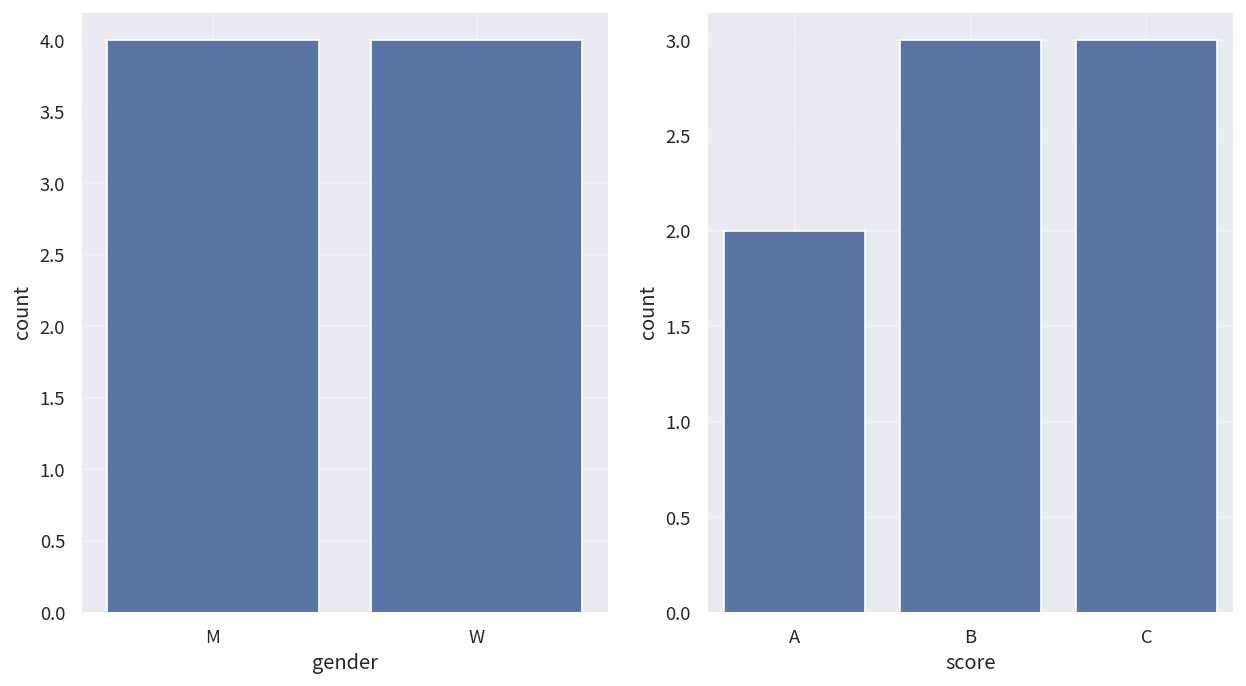

In [10]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) count plot 그리기
for i ,v in enumerate(df.columns):
  sb.countplot(data=df,x=v,ax=ax[i])
  ax[i].grid(True,alpha=0.3)


# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #03. 교차표
두 개 이상의 명목형(또는 범주형) 변수 간의 관계를 다변량 형태로 요약한 표  
→ 이를 **교차표(cross-tabulation)** 라고 한다.

두 개 이상의 범주형 변수 간의 관계를 파악하기 위해 사용한다.

## 단변량 분석 (univariate analysis)
- 하나의 변수에 대한 분포나 빈도를 확인하는 것

## 이변량/다변량 분석 (bivariate/multivariate analysis)
- 두 개 이상의 변수에 대한 분포나 빈도를 동시에 살펴보는 것  
- 교차표는 단변량 분포를 넘어서  
  **“범주 A 안에서 범주 B가 어떻게 분포하는지”** 를 보여주는 다변량적 분석 도구

---

# 📝 교차표를 사용해야 하는 경우

| 상황 종류             | 설명                                                         | 예시                         |
|-----------------------|--------------------------------------------------------------|------------------------------|
| 범주형 변수 관계 파악 | 두 범주형 변수 간의 분포 차이 확인                          | 성별 × 선호 음료            |
| 집단 간 비율 비교     | 각 집단이 어떤 범주에 더 많이 속하는지 비교                | 교육 수준 × 취업 여부       |
| 독립성 검정(χ²)       | 두 범주형 변수가 독립적인지 통계적으로 검정                | 투표 성향 × 연령대          |
| A/B 테스트 결과 비교  | 그룹별 반응 차이 확인                                        | 마케팅 집단(A/B) × 구매 여부 |
| 빈도 기반 품질·운영 분석 | 범주형 결과가 공정·라인에 따라 달라지는지 파악            | 불량 유형 × 생산 라인        |

---

# 📊 설문 응답 분포 분석
- 응답자 특성별 응답 패턴 파악  
  **예: 성별 × 직업군 × 만족도(다중 교차)**


#### 3-1 교차표 만들기

| 파라미터  | 설명                                      |
|-----------|-------------------------------------------|
| index     | 교차표의 인덱스로 사용할 변수 지정 (필수) |
| columns   | 교차표의 컬럼으로 사용할 변수 지정 (필수) |
| rownames  | 인덱스의 이름 설정                        |
| colnames  | 컬럼의 이름 설정                          |
| margins   | 집계 결과 포함 여부(True/False)           |



In [12]:
cb1 = crosstab(index=df['gender'],columns=df['score'],rownames=['성별'],colnames=['점수'])

cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


#### 3-2 비율과 합계 표시
margins= True (합계) ,normalize=True(비율) 파라미터 사용

In [13]:
cb2 = crosstab(index=origin['gender'],columns=origin['score'],rownames=['성별'],colnames=['점수'],margins=True,normalize=True)

cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


#### 3-3 교차표 시각화

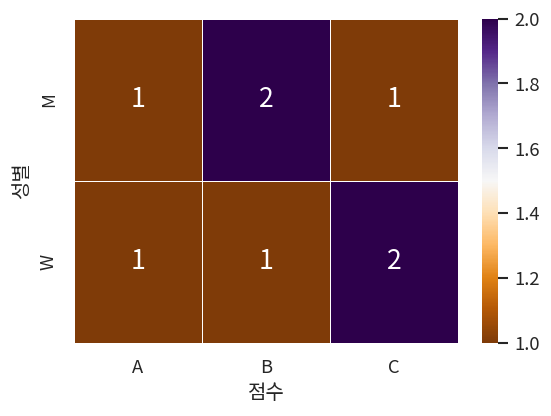

In [14]:
# 1) 그래프 초기화
width_px  = 600          # 그래프 가로 크기
height_px = 450          # 그래프 세로 크기
rows = 1                 # 그래프 행 수
cols = 1                 # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(data=cb1, annot=True, fmt="d",
           linewidth=0.5, cmap="PuOr")

# 3) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료
